1


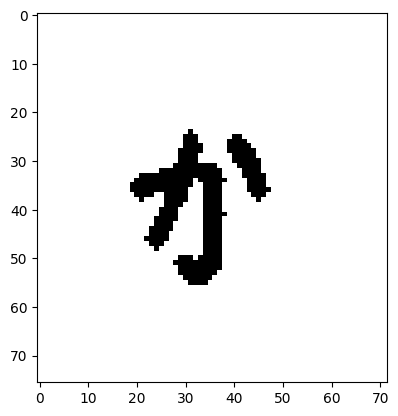

2


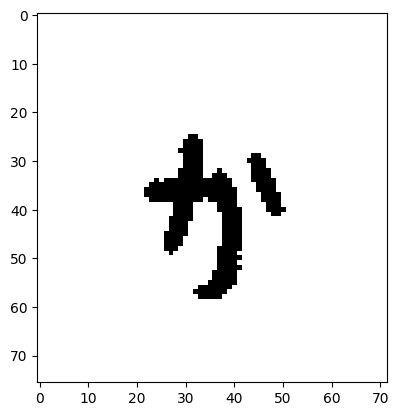

3


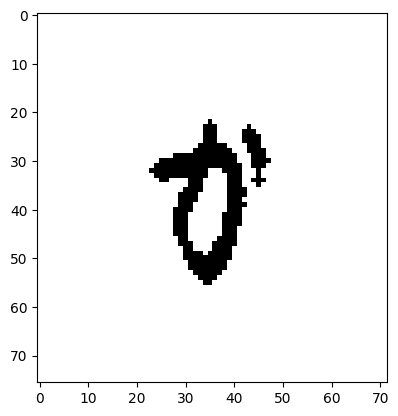

4


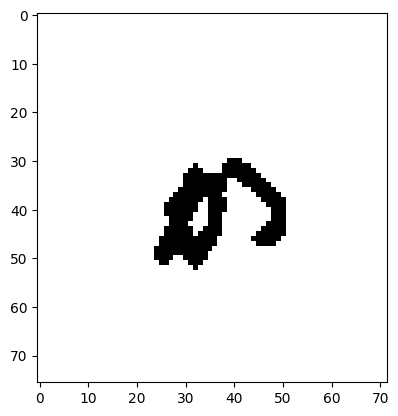

5


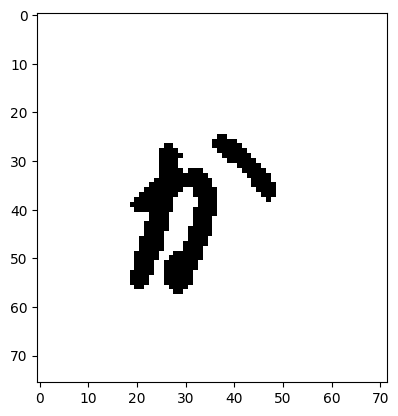

6


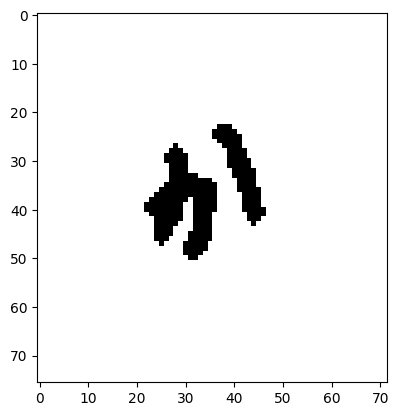

7


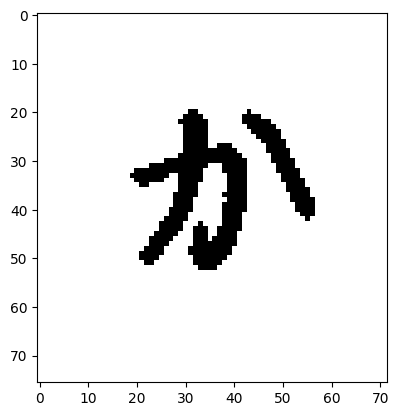

8


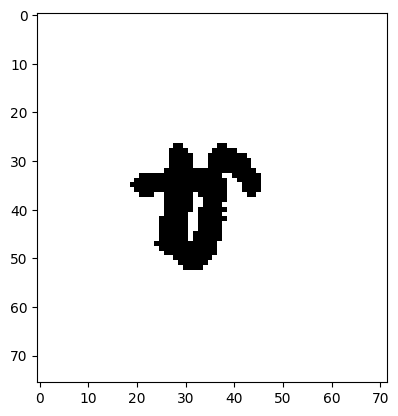

9


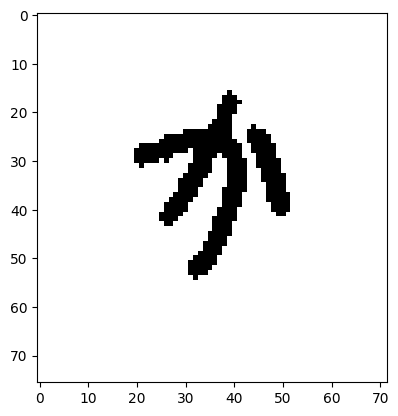

10


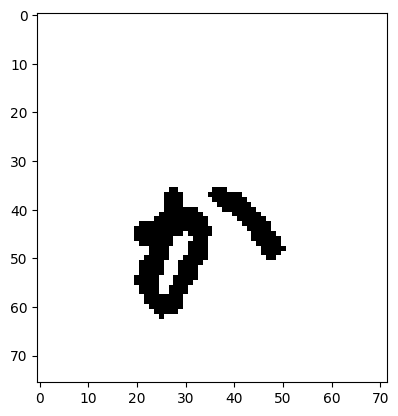

11


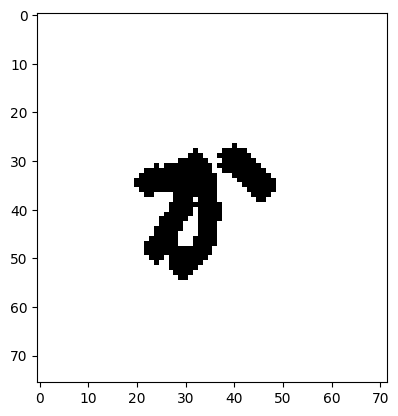

12


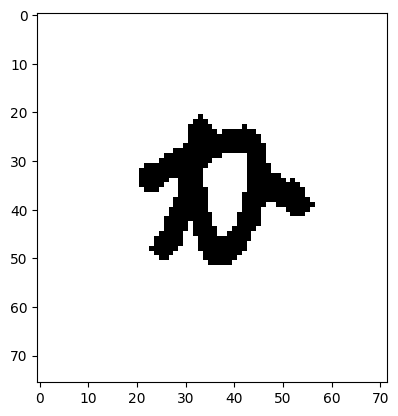

13


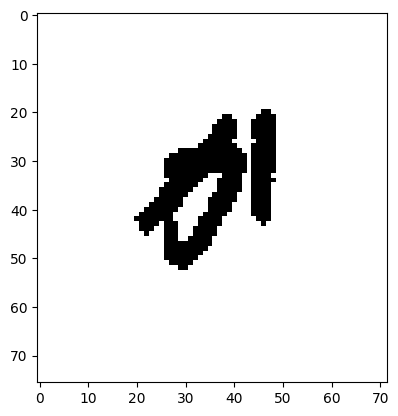

14


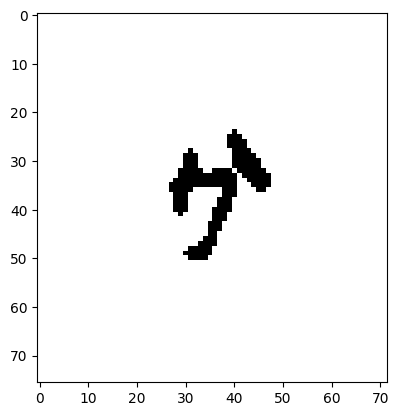

15


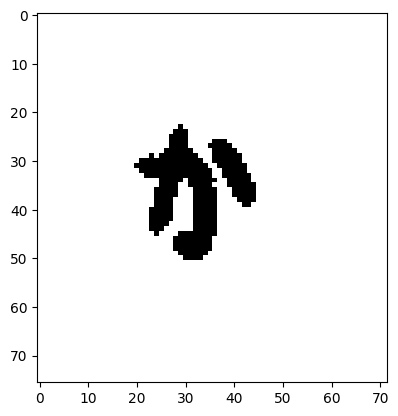

16


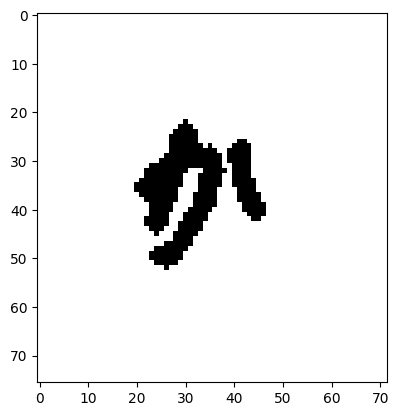

17


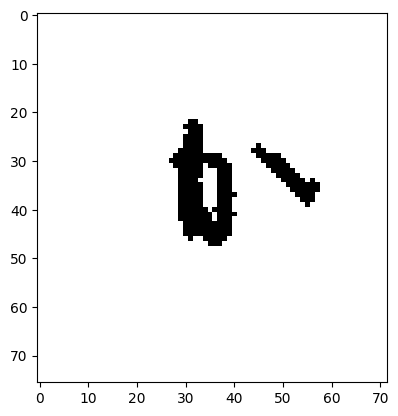

18


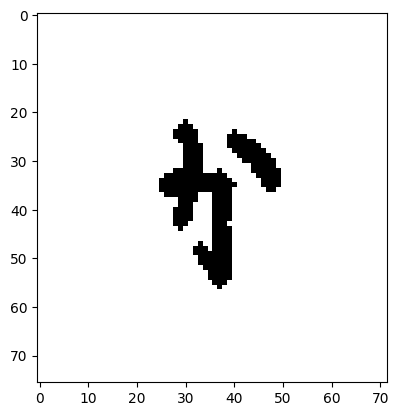

19


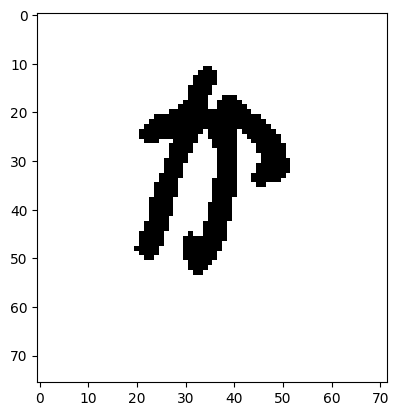

20


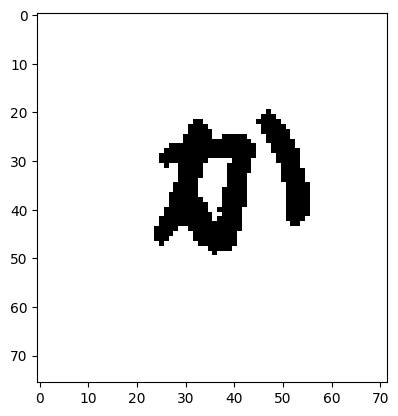

21


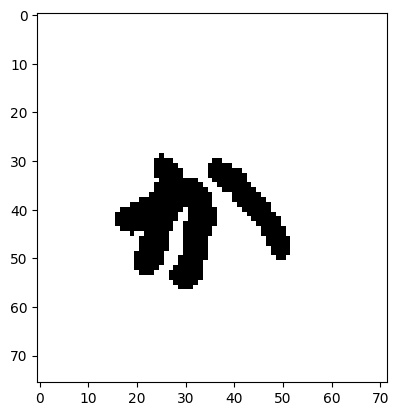

22


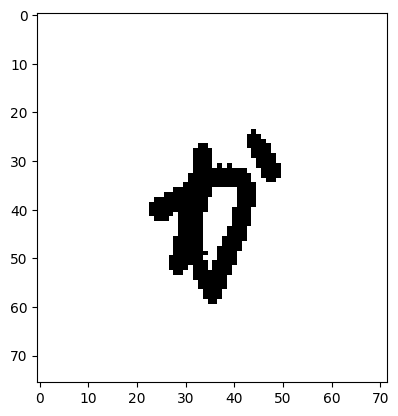

23


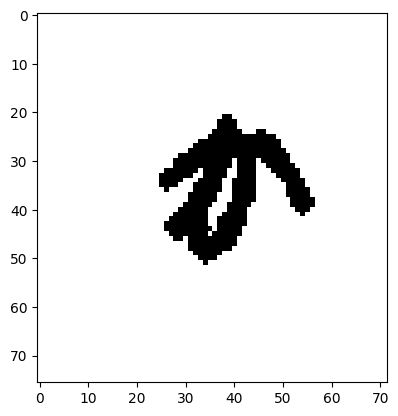

24


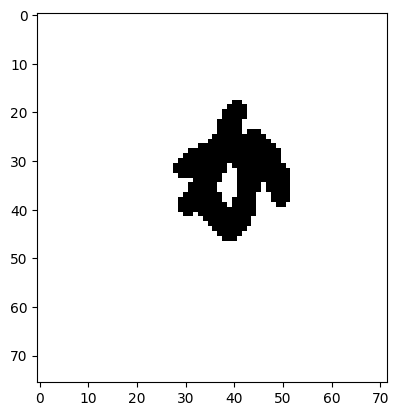

25


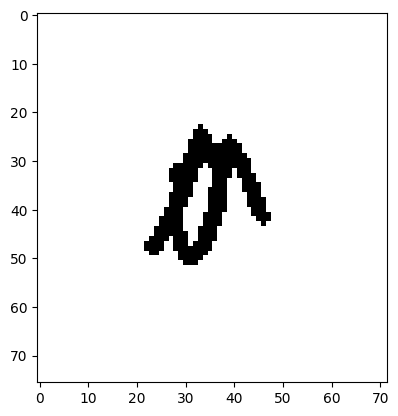

26


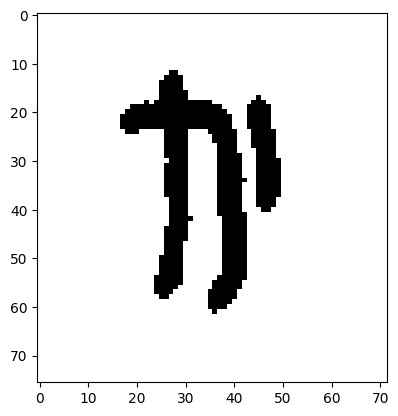

27


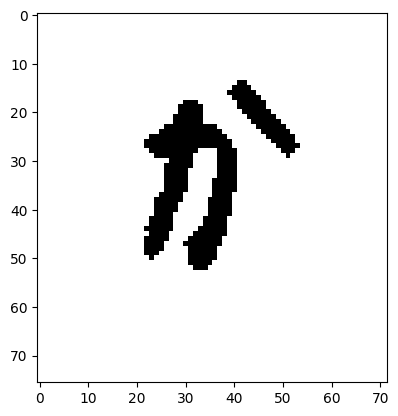

28


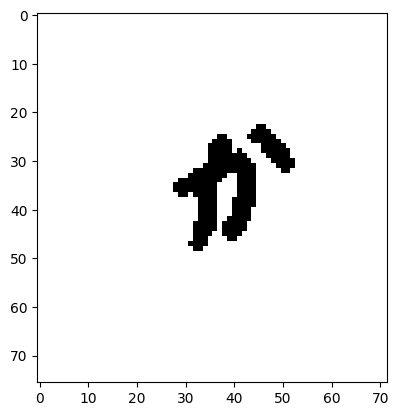

29


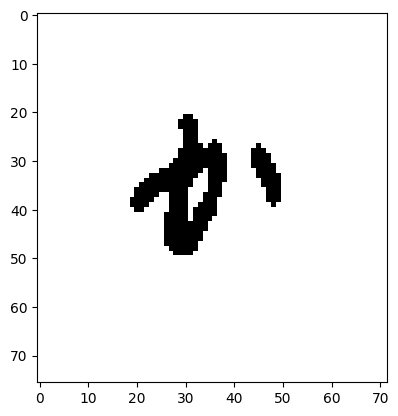

30


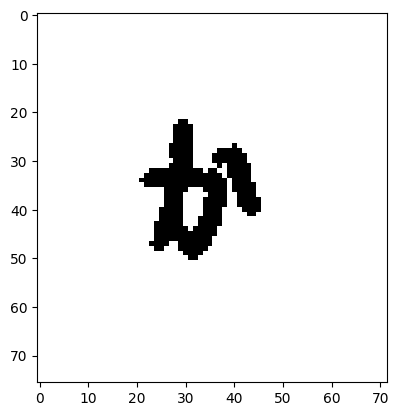

31


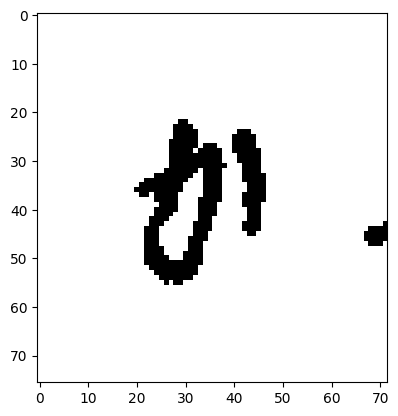

32


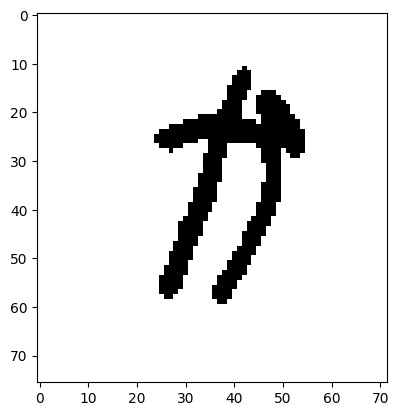

33


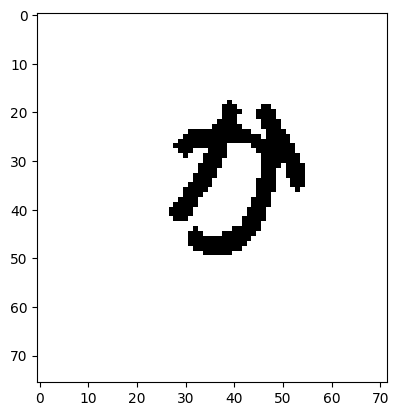

34


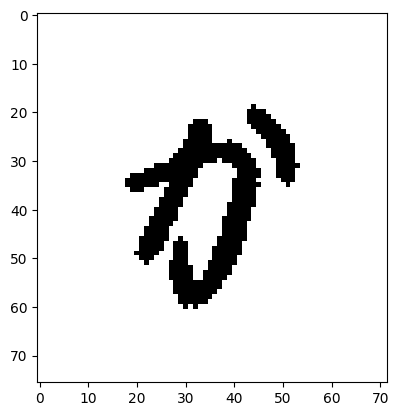

35


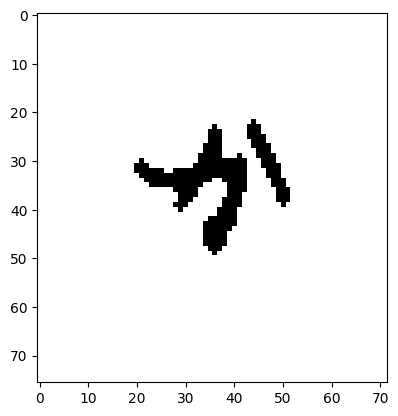

36


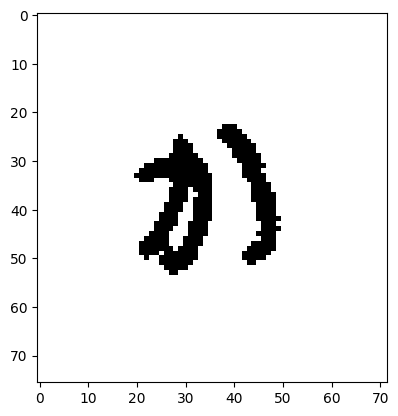

37


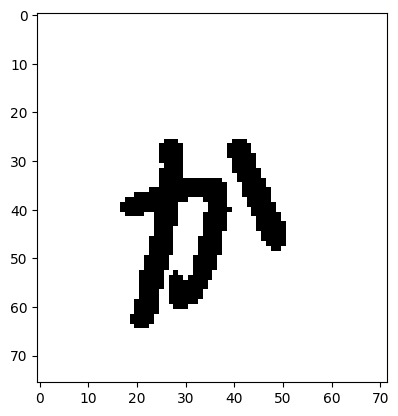

38


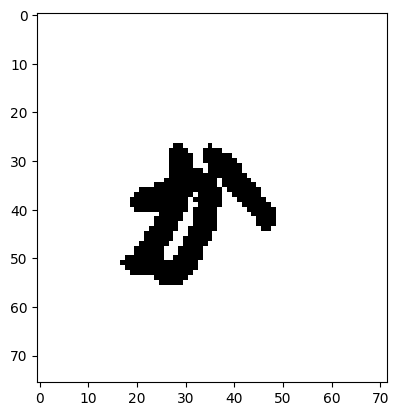

39


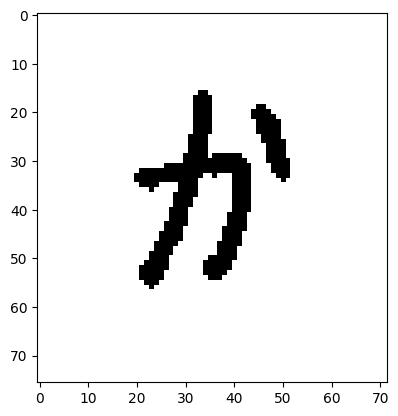

40


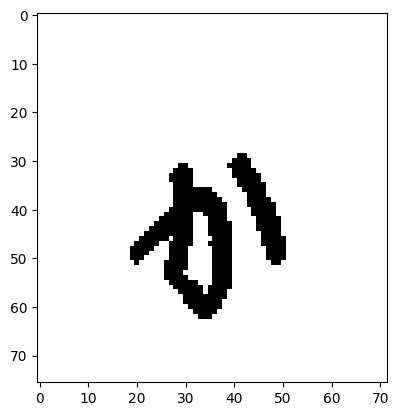

41


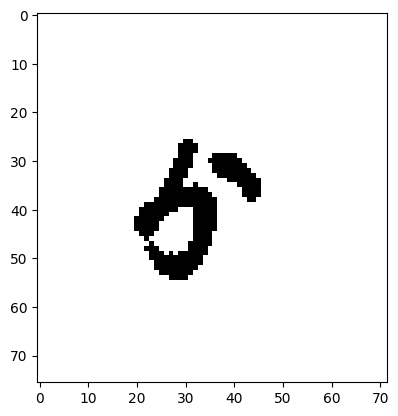

42


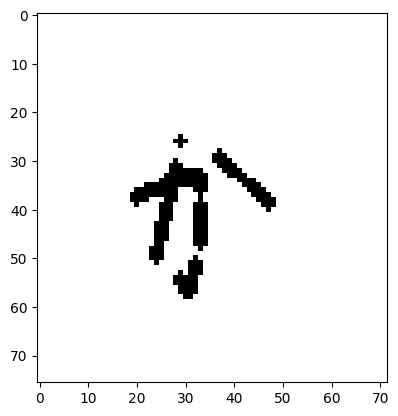

43


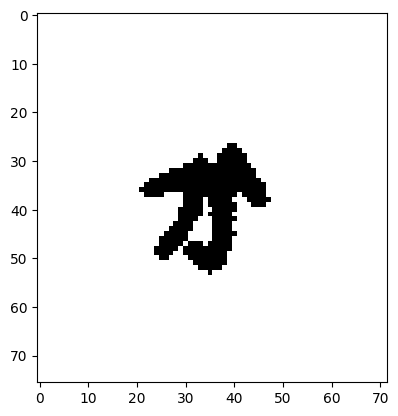

44


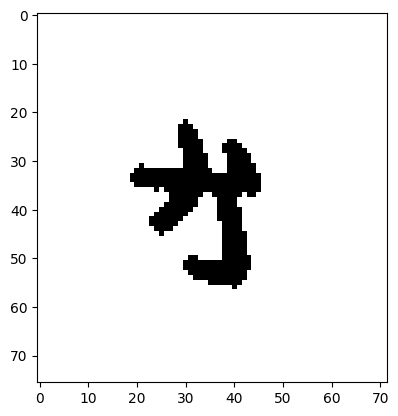

45


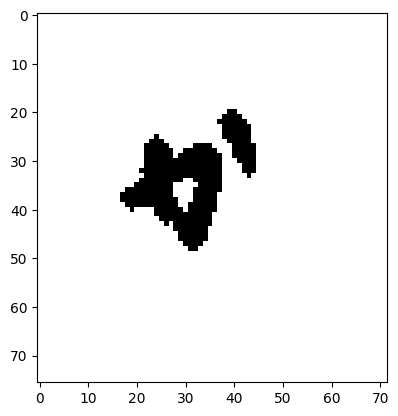

46


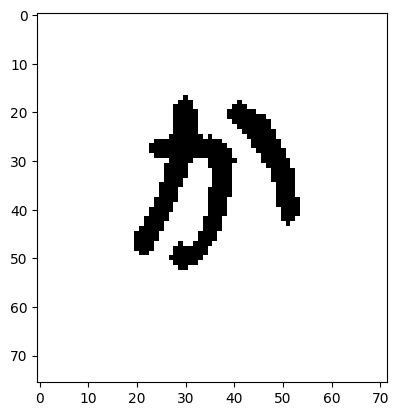

47


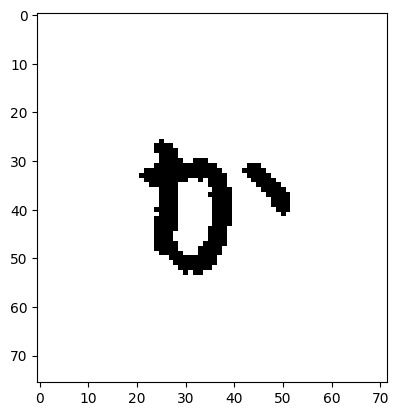

48


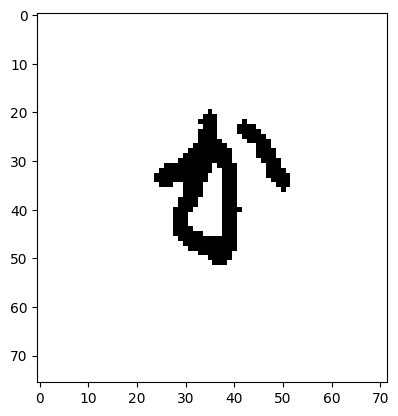

49


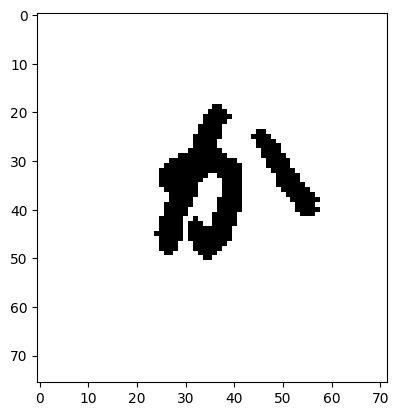

50


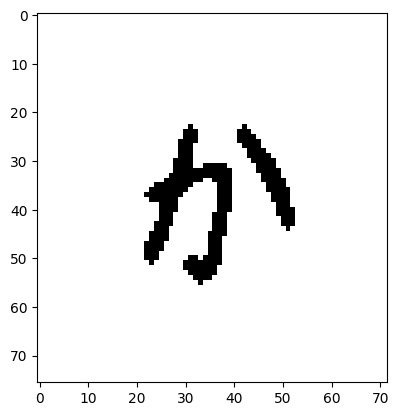

51


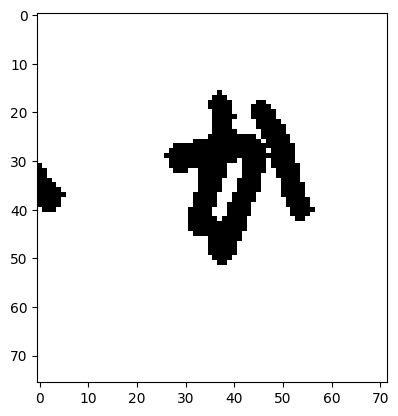

52


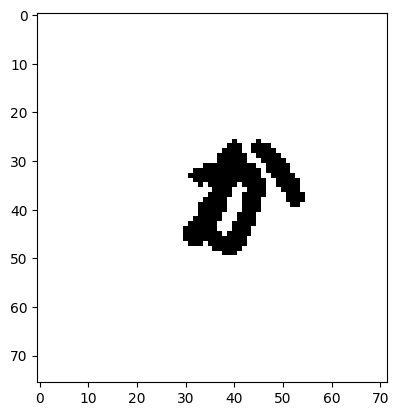

53


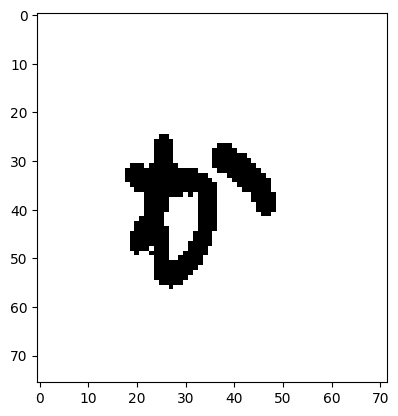

54


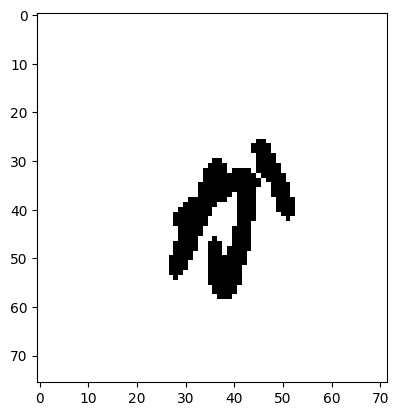

55


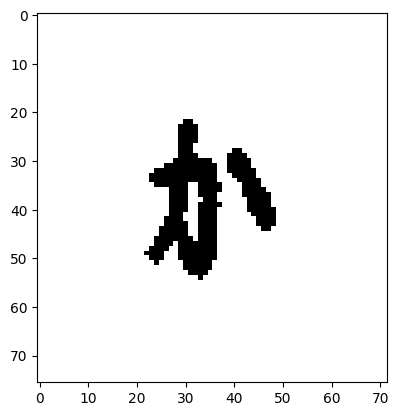

56


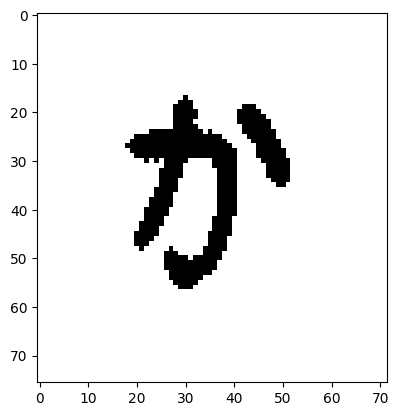

57


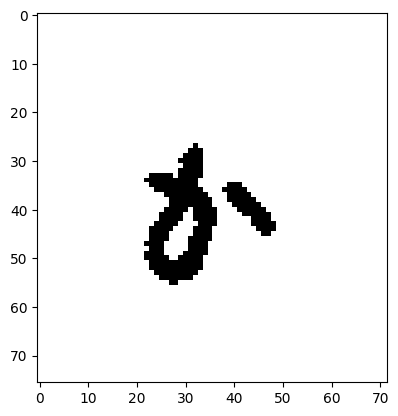

58


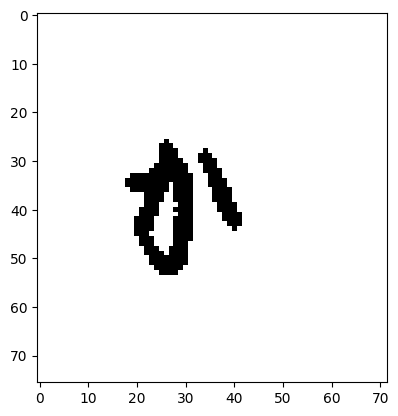

59


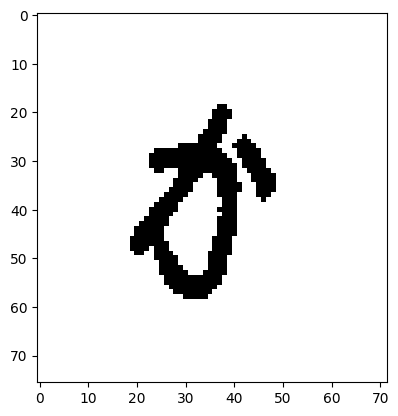

60


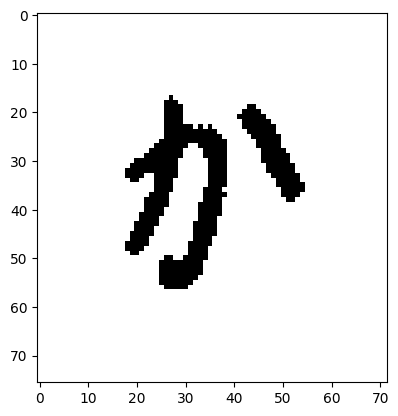

61


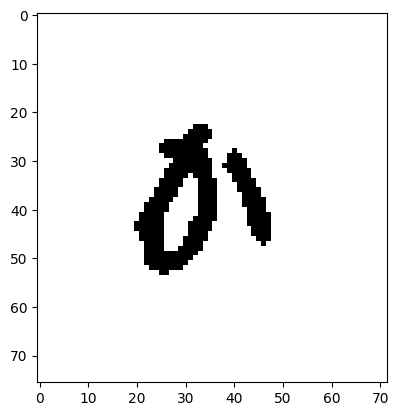

62


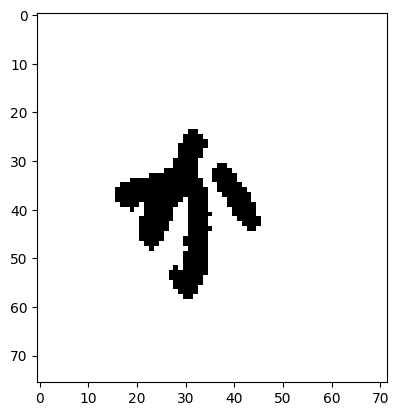

63


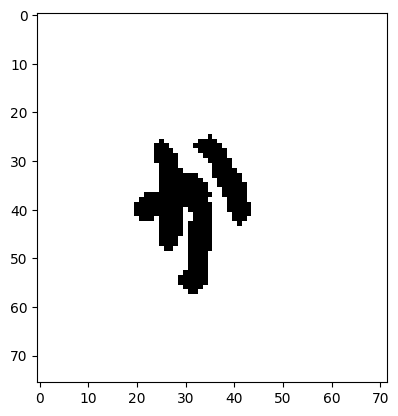

64


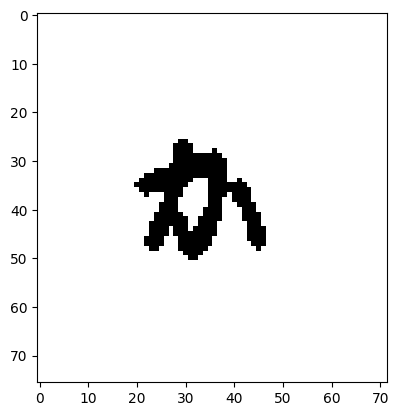

65


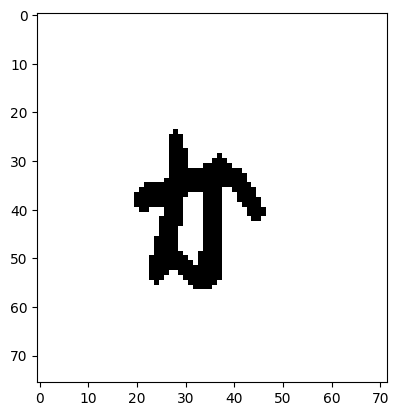

66


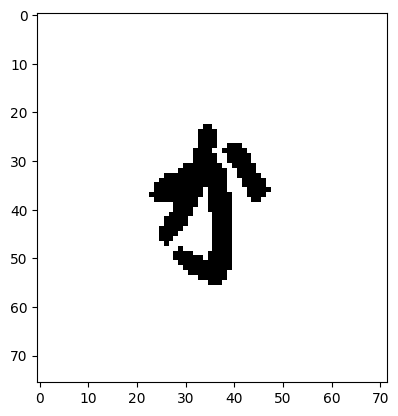

67


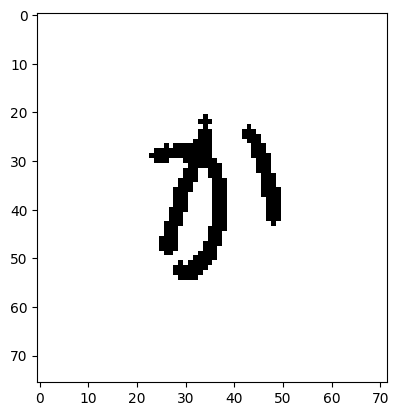

68


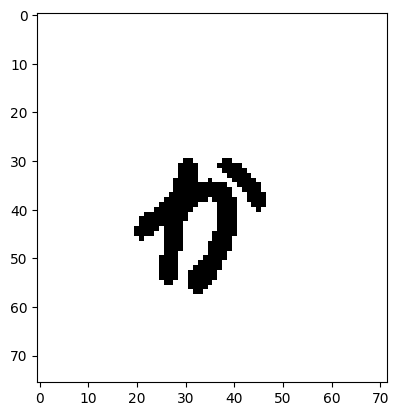

69


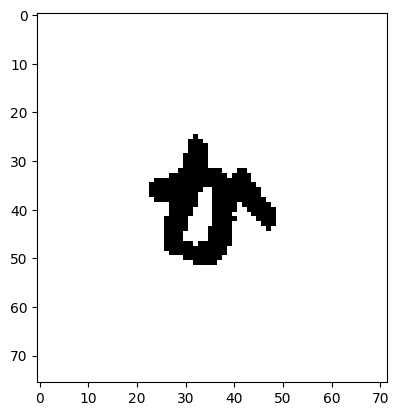

70


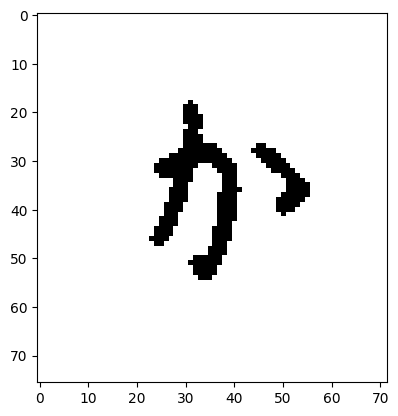

71


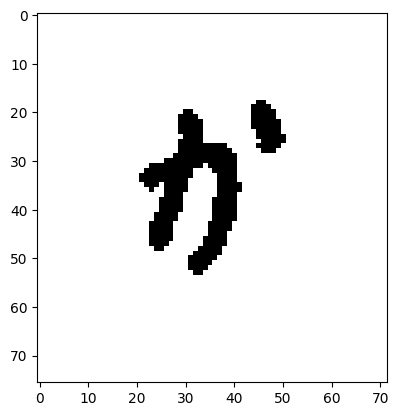

72


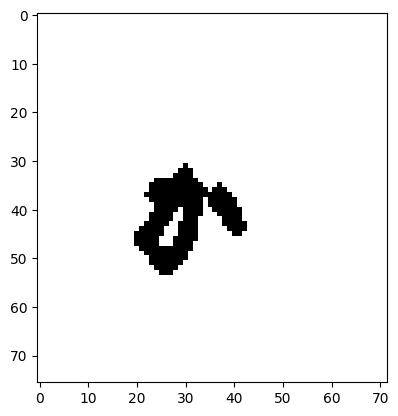

73


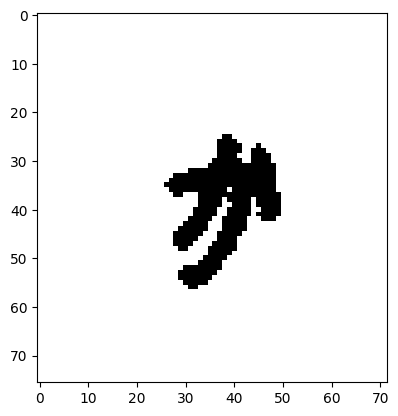

74


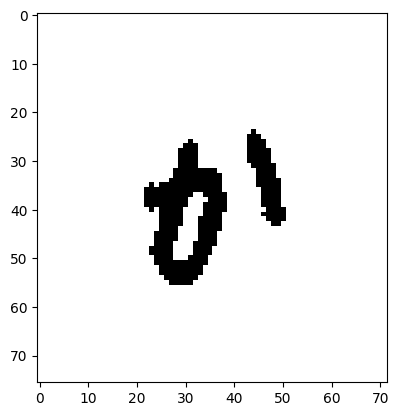

75


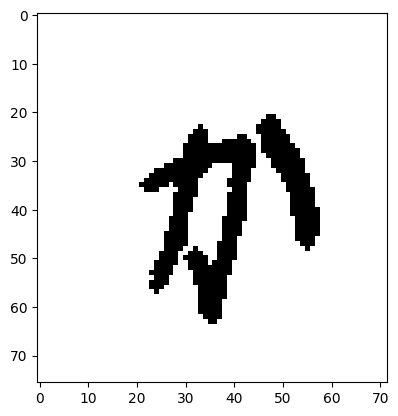

76


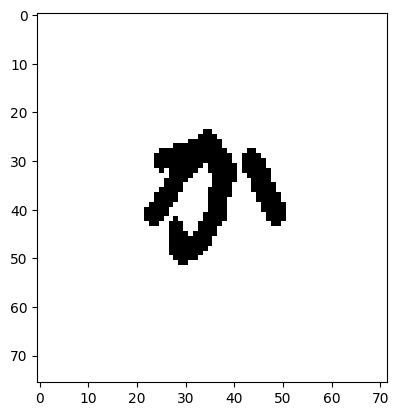

77


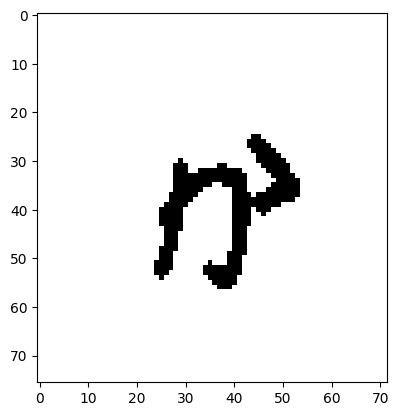

78


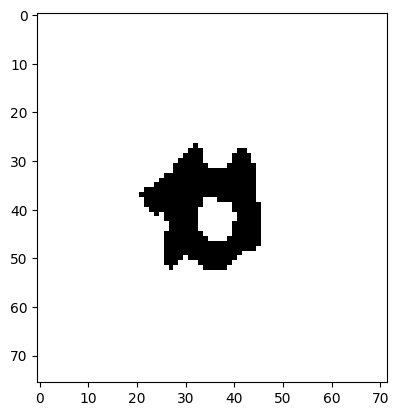

79


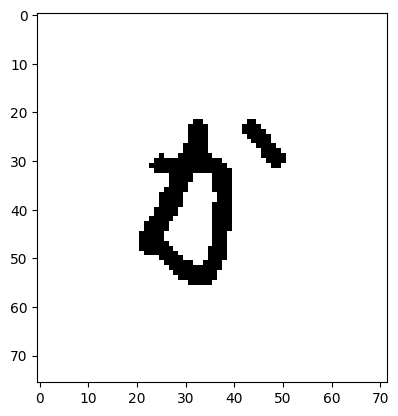

80


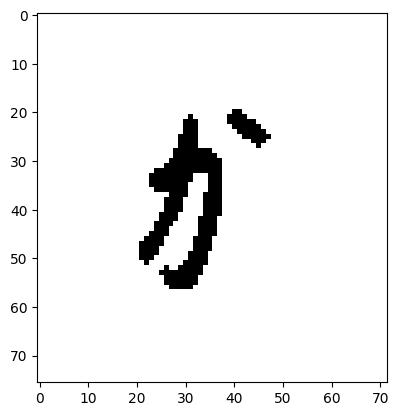

81


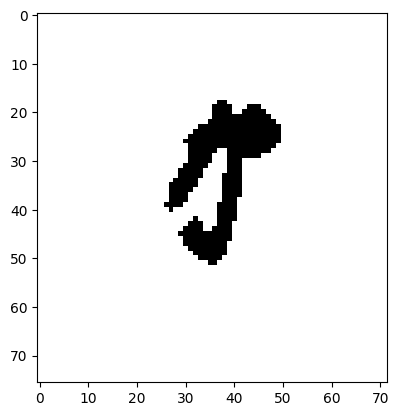

82


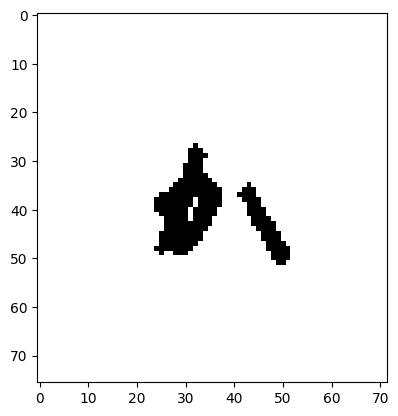

83


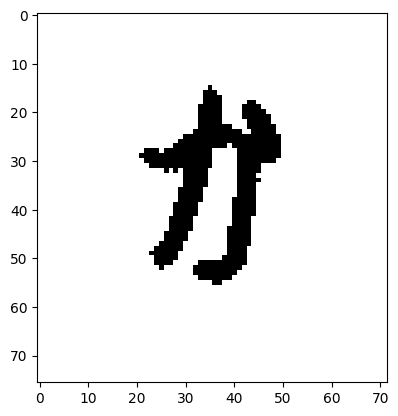

84


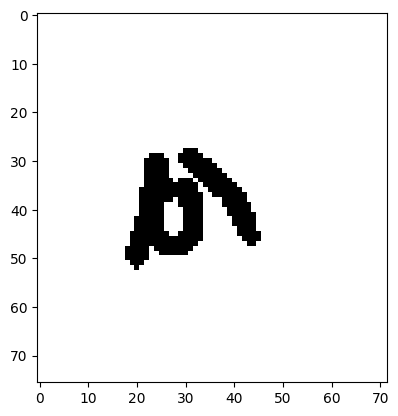

85


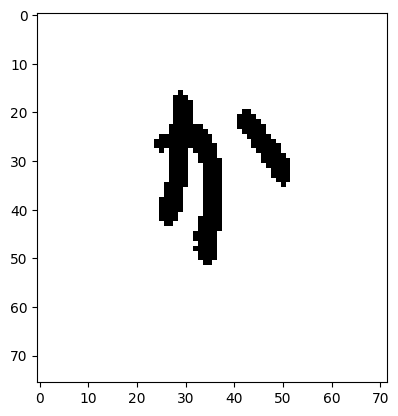

86


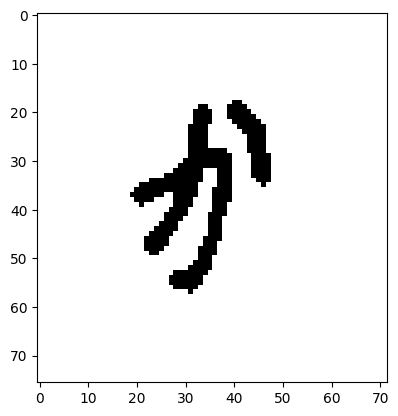

87


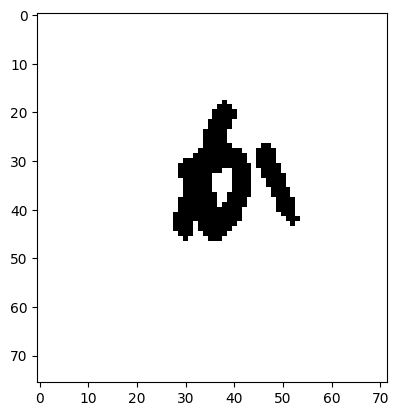

88


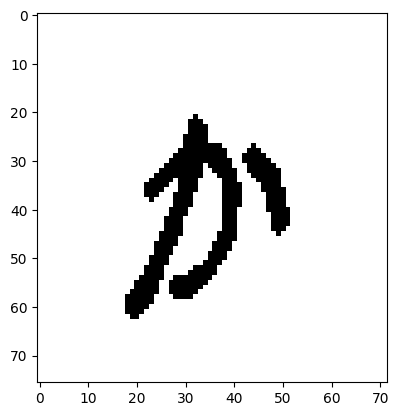

89


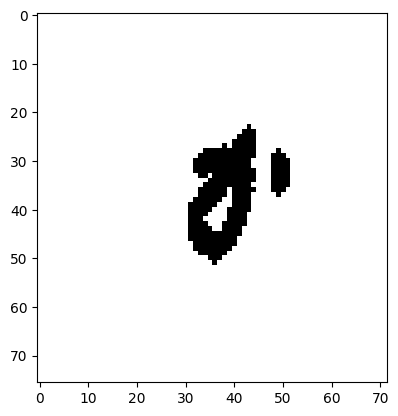

90


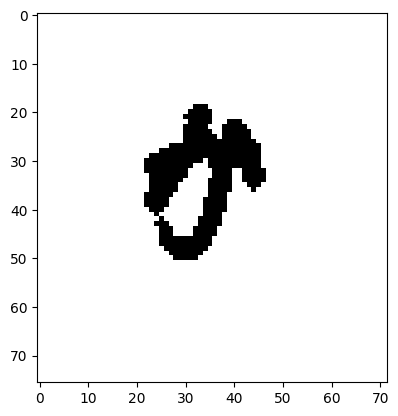

91


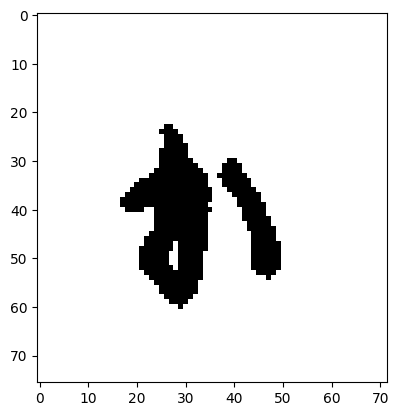

92


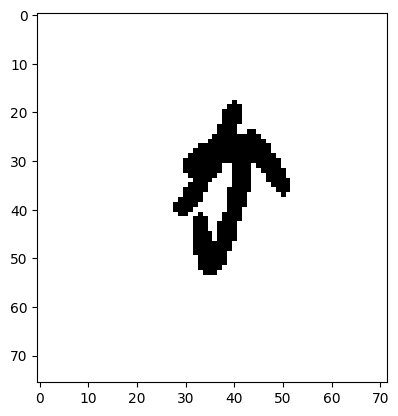

93


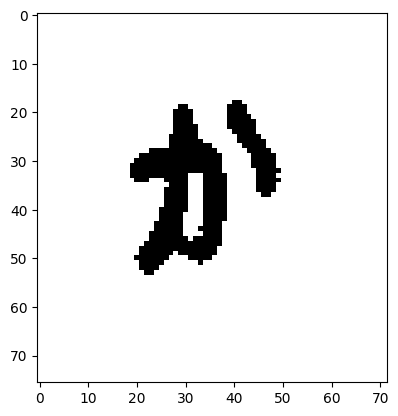

94


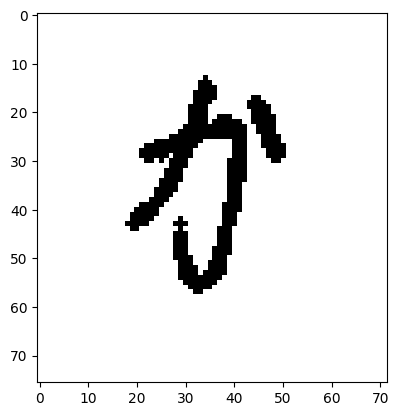

95


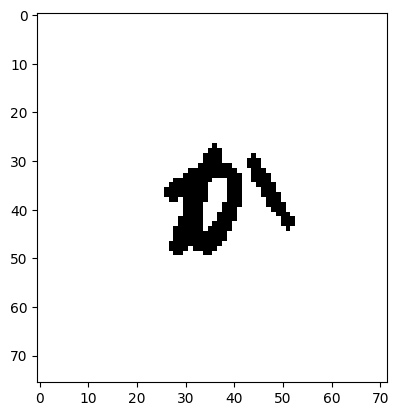

96


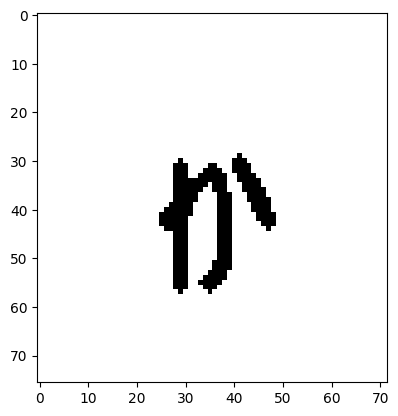

97


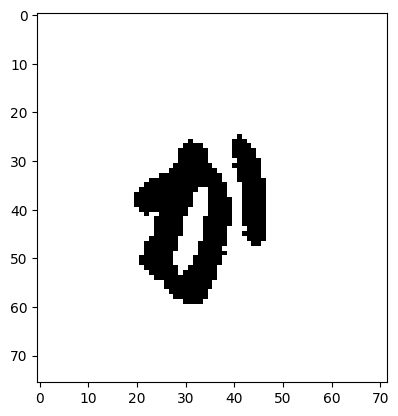

98


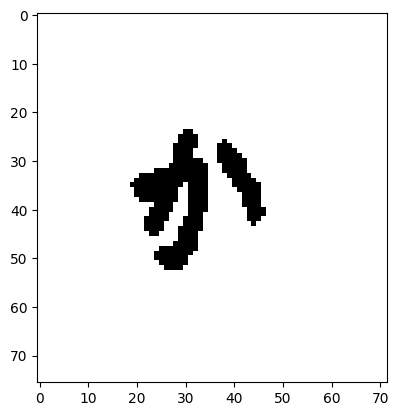

99


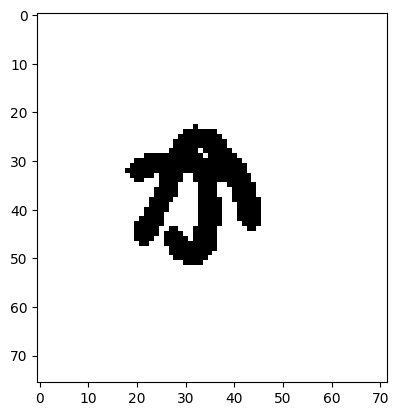

100


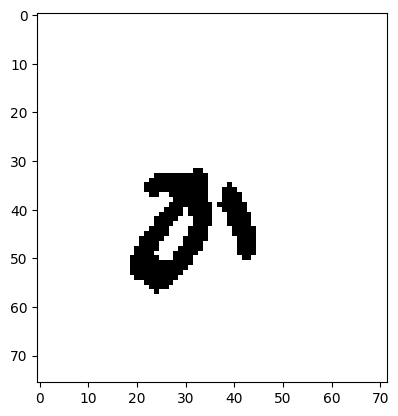

101


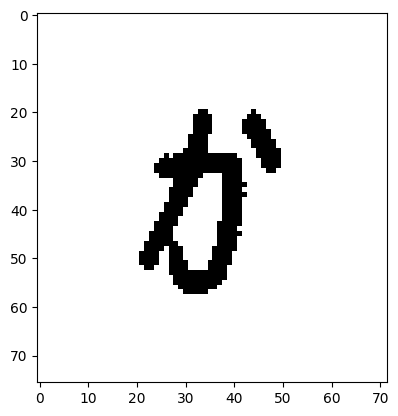

102


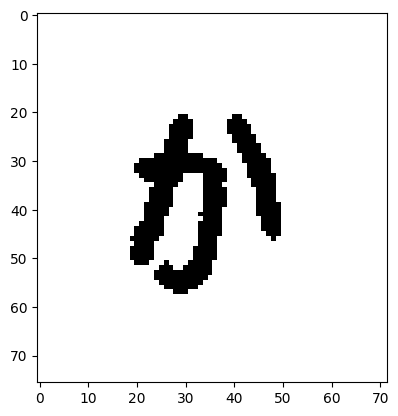

103


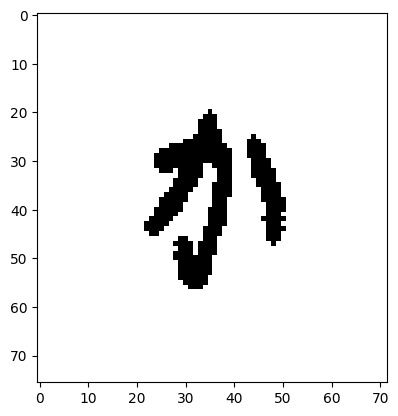

104


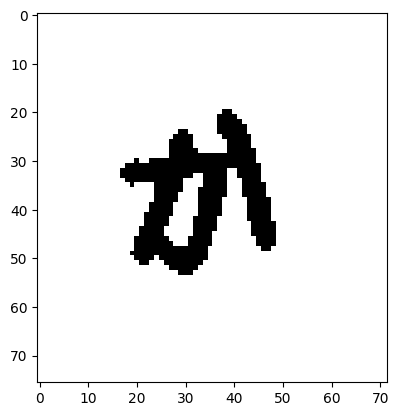

105


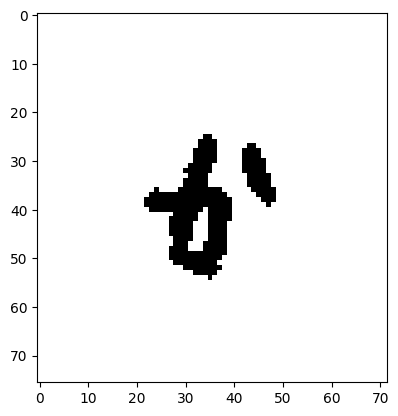

106


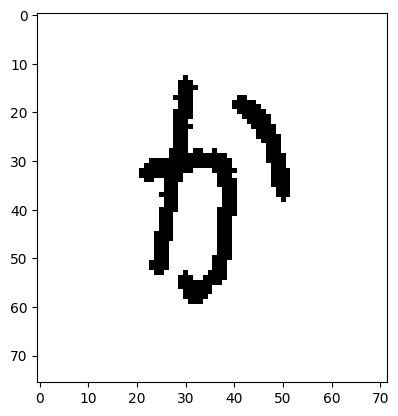

107


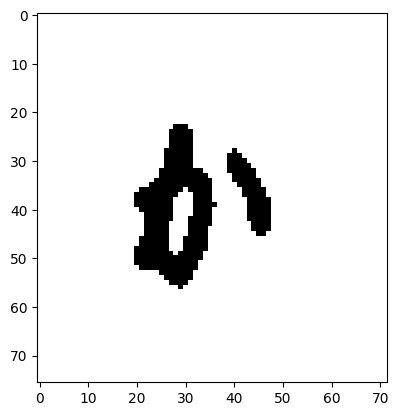

108


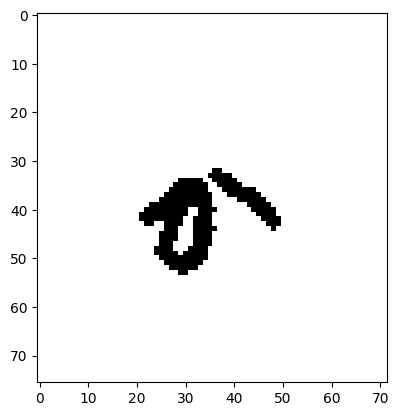

109


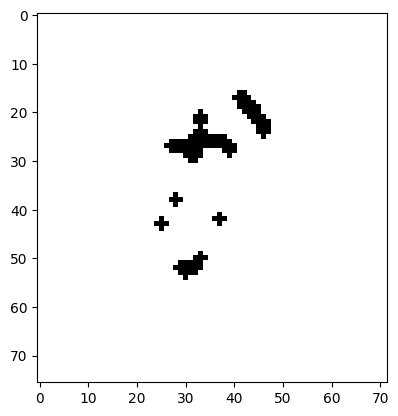

110


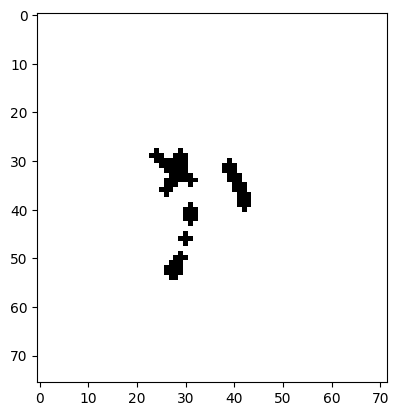

111


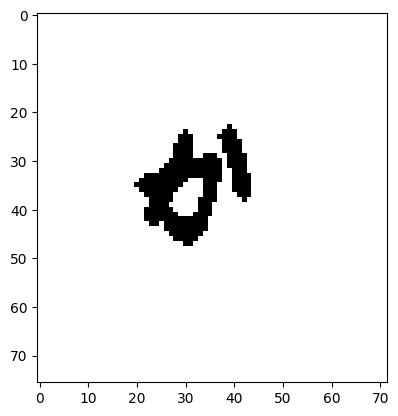

112


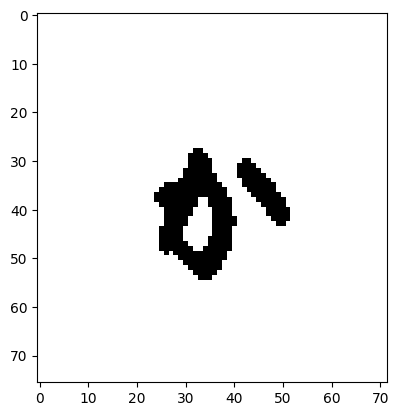

113


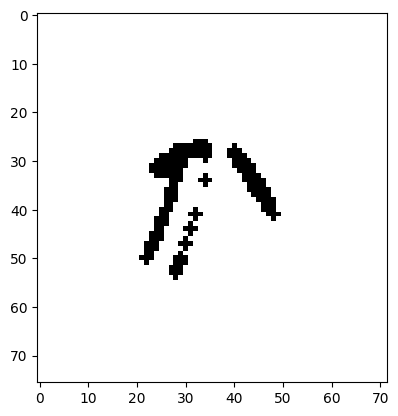

114


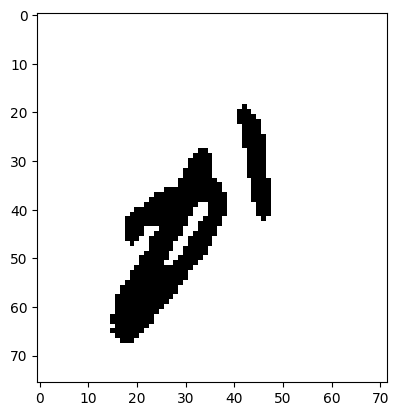

115


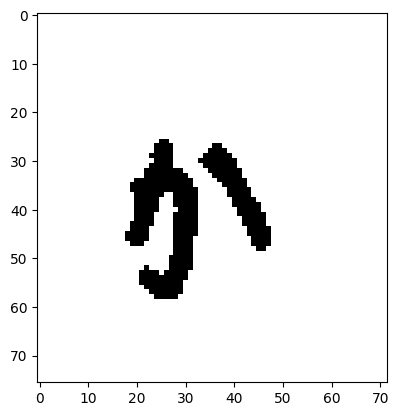

116


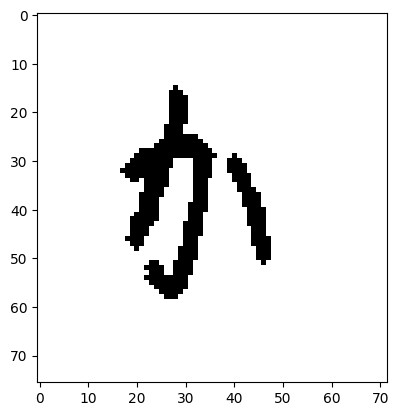

In [55]:
from PIL import Image
import os
import matplotlib.pyplot as plt
# Morphological filtering
from skimage.morphology import opening
from skimage.morphology import disk

# Data handling
import numpy as np

# Connected component filtering
import cv2

black = 0
white = 255
threshold = 170

# Define the folder path where the images are located
folder_path = "Hiragana/か"

count = 1

# Iterate over all the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load the image
        img = Image.open(os.path.join(folder_path, filename)).convert("LA")
        pixels = np.array(img)[:,:,0]

        # Apply the thresholding
        pixels[pixels > threshold] = white
        pixels[pixels < threshold] = black

        # Morphological opening
        blobSize = 1 # Select the maximum radius of the blobs you would like to remove
        structureElement = disk(blobSize)  # you can define different shapes, here we take a disk shape
        # We need to invert the image such that black is background and white foreground to perform the opening
        pixels = np.invert(opening(np.invert(pixels), structureElement))

        newImg = Image.fromarray(pixels).convert('RGB')
        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(pixels), connectivity=8)
        # Display the modified image
        print(count)
        plt.imshow(newImg)
        plt.show()
        count += 1
